# COS60008 Introduction to Data Science
## Assignment 3, 2024, Semester 1
## Student Details:
* Name: Harrison Stefanidis
* Student ID: 105260443
* Email: 105260443@student.swin.edu.au
* Submission Date: 06/06/2024
* TuteLab Class: Monday 12:30pm

## Task 3 - Extending Upon Underlying Features Affecting Wine Quality

### <i> Which Features Affect Wine Quality the Most? </i>

This extension upon Tasks 1 and 2 involves further investigating the features that affect wine quality in the red wine dataset previously used. The ultimate aim is to determine which features specifically have the highest impact on wine quality, which will subsequently point out where future analyses should be undertaken for this data.

### Sub-Task 3.1 - Load and Prepare Data

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('redwine_clean.csv')

### Sub-Task 3.2 - Fit Logistic Regression Model and Display Coefficients

In [58]:
# Define features and target variables
X = df.drop(columns=['Quality'])  # General features excluding target variable
y = df['Quality']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, 
      "Testing set shape:", X_test.shape)

# Initialise and fit regression model
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

# Get the coefficients
coefficients = logistic_regression.coef_[0]

# Create a DataFrame for better visualisation
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort DataFrame from absolute coefficient into value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display coefficients
print(feature_importance[['Feature', 'Coefficient']])

Training set shape: (1087, 11) Testing set shape: (272, 11)
                 Feature  Coefficient
1       Volatile_Acidity     1.450969
8                     pH     0.662368
4              Chlorides     0.352253
0          Fixed_Acidity     0.229683
5    Free_Sulfur_Dioxide     0.084348
7                Density     0.050669
2            Citric_Acid     0.025853
6   Total_Sulfur_Dioxide    -0.055382
9              Sulphates    -0.281865
3         Residual_Sugar    -0.828035
10               Alcohol    -0.929144


### Sub-Task 3.3 - Visualise Feature Importance

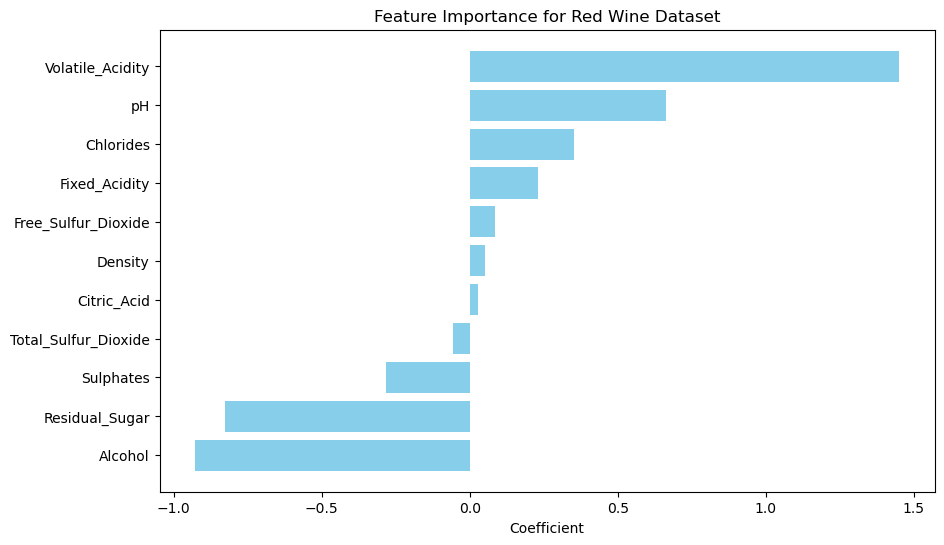

In [77]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importance for Red Wine Dataset')
plt.gca().invert_yaxis()
plt.show()

#### Summary:
As previously seen in Task 1, logistic regression was predominantly more effective in analysing the wine dataset presented. As such, further analysis into which features affected wine quality the most was delved into. A similar process was undertaken as Task 1, where the dataframe was simply loaded and the logistic regression model was trained, as well as the shape being checked to ensure the process was conducted correctly. Extending upon this, coefficients were obtained from the trained model and a new dataframe was created with each feature and its corresponding coefficient. Finally, these coefficients were printed in order of highest to lowest, and ultimately presented in a horizontal bar plot for visual representation.

The point of using a coefficient in this scenario is to identify whether the value has a positive or negative relationship with the feature in the dataset. A positive value means as the feature increases, the target variable (quality) also increases. Conversely, a negative value corresponds to the quality decreasing as the feature increases. The larger the value is, the stronger the relationship between feature and target variable.

Upon interpretation, volatile acidity, pH, and chlorides all have a strong positive relationship on wine quality, where higher levels of each of these features result in increased wine quality. This signifies that these three components should be heavily investigated to ensure meaningful and effective analysis upon improving wine quality for market production. Conversely, sulphates, residual sugar, and alcohol all have a negative influence on wine quality, whereby higher contents of each of these features consequently result in lower wine quality, and therefore should be reduced at all costs. The rest of the values have minimal influence on wine quality and therefore can be neglected.

Overall, it is imperative that these features should be looked into for future analysis as these features can ensure higher quality wine production and ultimately ensure effective targeted sales to a wide consumer base.